In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load Datasets

In [2]:
alldatasets = [
    'datasets/DatasetsProcessedTraceability/DatasetsProcessedTraceability/2019_ids.csv',
    'datasets/DatasetsProcessedTraceability/DatasetsProcessedTraceability/2020_ids.csv',
    'datasets/DatasetsProcessedTraceability/DatasetsProcessedTraceability/2021_ids.csv',
]

## Load datasets

In [3]:
df2019 = pd.read_csv(alldatasets[0])
df2020 = pd.read_csv(alldatasets[1])
df2021 = pd.read_csv(alldatasets[2])

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2019.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id_name_dev', 'id_aux', 'id', 'name',
       'dev', 'cat', 'market', 'subcat', 'acc_linking', 'in_skill_purchase',
       'cost', 'review_stars', 'skill_link', 'perm_requested_original', 'year',
       'perm_found_norm', 'perm_requested_norm', 'policy_url', 'policy_text',
       'traceability'],
      dtype='object')

### Examples

#### Total number of skills in 2019

In [5]:
allmarkets = df2019.market.unique()
for mk in allmarkets:
    print('{} unique skills found in {}'.format(len(df2019.loc[df2019['market'] == mk] ), mk))

23123 unique skills found in AU
24700 unique skills found in CA
8928 unique skills found in DE
1286 unique skills found in ES
1341 unique skills found in FR
20989 unique skills found in IN
2210 unique skills found in IT
2679 unique skills found in JP
897 unique skills found in MX
29094 unique skills found in UK
51338 unique skills found in US


#### Check how many skills have a policy over the years

In [6]:
#permission requested normalised
allmarkets = df2019.market.unique()
for mk in allmarkets:
    auxdf = df2019.loc[ (df2019['market']==mk) & (df2019['perm_requested_norm'].notnull())]
    print('{} unique skills have a policy in {}'.format(len(auxdf), mk))

120 unique skills have a policy in AU
158 unique skills have a policy in CA
0 unique skills have a policy in DE
0 unique skills have a policy in ES
0 unique skills have a policy in FR
111 unique skills have a policy in IN
0 unique skills have a policy in IT
0 unique skills have a policy in JP
0 unique skills have a policy in MX
287 unique skills have a policy in UK
658 unique skills have a policy in US


In [7]:
#permission requested original
allmarkets = df2019.market.unique()
for mk in allmarkets:
    auxdf = df2019.loc[ (df2019['market']==mk) & (df2019['perm_requested_original'].notnull())]
    print('{} unique skills have a policy in {}'.format(len(auxdf), mk))

150 unique skills have a policy in AU
197 unique skills have a policy in CA
256 unique skills have a policy in DE
42 unique skills have a policy in ES
29 unique skills have a policy in FR
158 unique skills have a policy in IN
25 unique skills have a policy in IT
74 unique skills have a policy in JP
29 unique skills have a policy in MX
351 unique skills have a policy in UK
798 unique skills have a policy in US


In [8]:
allmarkets = df2020.market.unique()
for mk in allmarkets:
    auxdf = df2020.loc[ (df2020['market']==mk) & (df2020['perm_requested_norm'].notnull())]
    print('{} unique skills have a policy in {}'.format(len(auxdf), mk))

212 unique skills have a policy in AU
251 unique skills have a policy in CA
0 unique skills have a policy in DE
0 unique skills have a policy in ES
0 unique skills have a policy in FR
270 unique skills have a policy in IN
0 unique skills have a policy in IT
0 unique skills have a policy in JP
0 unique skills have a policy in MX
441 unique skills have a policy in UK
1301 unique skills have a policy in US


In [9]:
allmarkets = df2021.market.unique()
for mk in allmarkets:
    auxdf = df2021.loc[ (df2021['market']==mk) & (df2021['perm_requested_norm'].notnull())]
    print('{} unique skills have a policy in {}'.format(len(auxdf), mk))

235 unique skills have a policy in AU
250 unique skills have a policy in CA
40 unique skills have a policy in DE
0 unique skills have a policy in ES
0 unique skills have a policy in FR
243 unique skills have a policy in IN
0 unique skills have a policy in IT
0 unique skills have a policy in JP
0 unique skills have a policy in MX
461 unique skills have a policy in UK
1522 unique skills have a policy in US


#### Number of developers per market in 2019

In [10]:
allmarkets = df2019.market.unique()
for mk in allmarkets:
    marketdf = df2019.loc[df2019['market'] == mk]
    alldevs = marketdf.dev.unique()
    print('{} unique devs in {}'.format(len(alldevs), mk))

10123 unique devs in AU
10773 unique devs in CA
3165 unique devs in DE
716 unique devs in ES
641 unique devs in FR
9197 unique devs in IN
1095 unique devs in IT
1056 unique devs in JP
540 unique devs in MX
12078 unique devs in UK
19507 unique devs in US


#### check how many skills have the same name__dev in 2021

In [11]:
allmarkets = df2021.market.unique()
for mk in allmarkets:
    marketdf = df2021.loc[df2021['market'] == mk]
    print('{} market, {} unique id__dev, {} total entries'.format(mk, len(marketdf.id_name_dev.unique()), len(marketdf) ))
   

AU market, 24228 unique id__dev, 24512 total entries
CA market, 26763 unique id__dev, 27093 total entries
DE market, 10593 unique id__dev, 10631 total entries
ES market, 5419 unique id__dev, 5435 total entries
FR market, 2835 unique id__dev, 2863 total entries
IN market, 28221 unique id__dev, 28672 total entries
IT market, 4640 unique id__dev, 4649 total entries
JP market, 3623 unique id__dev, 3637 total entries
MX market, 2484 unique id__dev, 2486 total entries
UK market, 36698 unique id__dev, 37056 total entries
US market, 68157 unique id__dev, 68667 total entries


#### check if permissions are correctly mapped for all datasets

In [12]:
print( df2019[df2019['name']=='Stitcher'][['name', 'dev', 'market', 'perm_requested_norm', 'year', 'id']] )

            name          dev market                 perm_requested_norm  \
741     Stitcher  by Stitcher     AU  ['device country and postal code']   
23486   Stitcher  by Stitcher     CA  ['device country and postal code']   
76032   Stitcher  by Stitcher     IN  ['device country and postal code']   
88152   Stitcher  by Stitcher     UK  ['device country and postal code']   
116194  Stitcher  by Stitcher     US  ['device country and postal code']   

        year   id  
741     2019  742  
23486   2019  742  
76032   2019  742  
88152   2019  742  
116194  2019  742  


In [13]:
print( df2020[df2020['name']=='Stitcher'][['name', 'dev', 'market', 'perm_requested_norm', 'year', 'id']] )

            name          dev market                 perm_requested_norm  \
41308   Stitcher  by Stitcher     CA  ['device country and postal code']   
131165  Stitcher  by Stitcher     UK  ['device country and postal code']   
177055  Stitcher  by Stitcher     US  ['device country and postal code']   

        year   id  
41308   2020  742  
131165  2020  742  
177055  2020  742  


In [14]:
print( df2021[df2021['name']=='Stitcher'][['name', 'dev', 'market', 'perm_requested_norm', 'year', 'id']] )

            name          dev market                 perm_requested_norm  \
93991   Stitcher  by Stitcher     IN  ['device country and postal code']   
131778  Stitcher  by Stitcher     UK  ['device country and postal code']   
172109  Stitcher  by Stitcher     US  ['device country and postal code']   

        year   id  
93991   2021  742  
131778  2021  742  
172109  2021  742  


##### check number of unique skills with policy among markets

In [15]:
#number of unique skills (skillname_dev) that requested for one or more permissions in 2019
df2019_selected = df2019.loc[ (df2019['perm_requested_original'].notnull()) ]
df2019_selected = df2019_selected.drop_duplicates(subset='id_name_dev', keep="last")
df2019_selected = df2019_selected.drop(['market'], axis = 1)
print('Unique skills with at least one permission 2019', len(df2019_selected))

Unique skills with at least one permission 2019 1429


#### check how skills with policy change over the years

In [16]:
df2019.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id_name_dev', 'id_aux', 'id', 'name',
       'dev', 'cat', 'market', 'subcat', 'acc_linking', 'in_skill_purchase',
       'cost', 'review_stars', 'skill_link', 'perm_requested_original', 'year',
       'perm_found_norm', 'perm_requested_norm', 'policy_url', 'policy_text',
       'traceability'],
      dtype='object')

In [17]:
def findSkillById(skillid, dataframes, columnstoshow = ['name', 'dev']):
    '''
    skillid : int, representing skill id
    dataframes : list of dataframes to check
    '''
    for df in dataframes:
        print(df[df['id']==skillid][columnstoshow])
    
    

In [18]:
#first preselect the interesting markets and only these skills that have permissions
df2019_selected = df2019.loc[ (df2019['market'].isin(['US', 'UK', 'CA', 'AU', 'IN'])) & (df2019['perm_requested_norm'].notnull()) ]
df2019_selected = df2019_selected.drop_duplicates(subset='id_name_dev', keep="last")
df2019_selected = df2019_selected.drop(['market'], axis = 1)
print('Unique skills with at least one permission 2019', len(df2019_selected))

df2020_selected = df2020.loc[ (df2020['market'].isin(['US', 'UK', 'CA', 'AU', 'IN'])) & (df2020['perm_requested_norm'].notnull()) ]
df2020_selected = df2020_selected.drop_duplicates(subset='id_name_dev', keep="last")
df2020_selected = df2020_selected.drop(['market'], axis = 1)
print('Unique skills with at least one permission 2020', len(df2020_selected))

df2021_selected = df2021.loc[ (df2021['market'].isin(['US', 'UK', 'CA', 'AU', 'IN'])) & (df2021['perm_requested_norm'].notnull()) ]
df2021_selected = df2021_selected.drop_duplicates(subset='id_name_dev', keep="last")
df2021_selected = df2021_selected.drop(['market'], axis = 1)
print('Unique skills with at least one permission 2021', len(df2021_selected))

Unique skills with at least one permission 2019 838
Unique skills with at least one permission 2020 1635
Unique skills with at least one permission 2021 1849


In [19]:
#exmple execution for 'SUNRISE__by Seven West Media - Digital Depa...', with id 1356
findSkillById(1356, [df2019_selected, df2020_selected, df2021_selected], columnstoshow = ['name', 'dev', 'perm_requested_norm', 'year'])


           name                                       dev  \
1355  7 SUNRISE  by Seven West Media - Digital Department   

                     perm_requested_norm  year  
1355  ['device country and postal code']  2019  
            name                                       dev  \
19344  7 SUNRISE  by Seven West Media - Digital Department   

                      perm_requested_norm  year  
19344  ['device country and postal code']  2020  
            name                                       dev  \
16823  7 SUNRISE  by Seven West Media - Digital Department   

                      perm_requested_norm  year  
16823  ['device country and postal code']  2021  


##### Evaluate difference between 2019 and 2020 over skill sets

In [20]:
def evaluatediffbetweenyears(olddf, newdf):
    newskills = []
    deletedskills = []
    skillsincreasedpermissionrequests = []
    skillsdecreasedpermissionrequests = []
    skillshavethesamepermissions = []

    pairdfs = [olddf, newdf]
    for index, row in pairdfs[0].iterrows():
        idskill = row['id']
        permissions_requested_1 = row['perm_requested_norm']
        permissions_requested_1 = permissions_requested_1.replace('[', '').replace(']', '').replace('\'', '').split(',')

        permissions_requested_2 = pairdfs[1][pairdfs[1]['id'] == idskill]    
        if(permissions_requested_2 is not None and len(permissions_requested_2)>0):
            permissions_requested_2 = permissions_requested_2['perm_requested_norm'].tolist()[0]    
            permissions_requested_2 = permissions_requested_2.replace('[', '').replace(']', '').replace('\'', '').split(',')

            if(len(permissions_requested_1) > len(permissions_requested_2)):
                skillsdecreasedpermissionrequests.append(idskill)
            if(len(permissions_requested_2) > len(permissions_requested_1)):
                skillsincreasedpermissionrequests.append(idskill)
            if(len(permissions_requested_2) == len(permissions_requested_1)):
                skillshavethesamepermissions.append(idskill)
        else:
            #if we don't find a skill in the new dataframe, that menas that the skill is either deleted 
            #or is no longer asking for more permissions
            deletedskills.append(idskill)
        
        #
        # uncomment this to print info
        #
        #print(idskill)
        #print(permissions_requested_1)
        #print(permissions_requested_2)
        #print('newskills', newskills)
        #print('deletedskills', deletedskills)
        #print('skillsincreasedpermissionrequests', skillsincreasedpermissionrequests)
        #print('skillsdecreasedpermissionrequests', skillsdecreasedpermissionrequests)
        #print('skillshavethesamepermissions', skillshavethesamepermissions)


    ids1 = pairdfs[0].id.unique().tolist()
    ids2 = pairdfs[1].id.unique().tolist()
    diffid2id1 = [k for k in ids2 if k not in ids1]    
    newskills = diffid2id1

    print('>Newskills, skills that didnt exist before/didnt ask for permissions before, but now they do', len(newskills))
    print('>Deletedskills, skills that asked for permissions before, but now they dont (either because they removed all permission requests)', len(deletedskills))
    print('>Skills that request for more permissions (does not include new skills)', len(skillsincreasedpermissionrequests))
    print('>Skills that request for less permissions (does not include removed skills)', len(skillsdecreasedpermissionrequests))
    print('>Skills that request the same permissions', len(skillshavethesamepermissions))
    
    return [newskills, deletedskills, skillsincreasedpermissionrequests, skillsdecreasedpermissionrequests, skillshavethesamepermissions]

In [21]:
#compare 2019 with 2020
ret1 = evaluatediffbetweenyears(df2019_selected, df2020_selected)

>Newskills, skills that didnt exist before/didnt ask for permissions before, but now they do 996
>Deletedskills, skills that asked for permissions before, but now they dont (either because they removed all permission requests) 199
>Skills that request for more permissions (does not include new skills) 14
>Skills that request for less permissions (does not include removed skills) 3
>Skills that request the same permissions 622


# New Skills Traceability Attributes from 2019 to 2020 

In [22]:
NewSkillId = ret1[0]
NewSkill2020 = df2020[df2020.id.isin(NewSkillId)].drop_duplicates(subset=['id_name_dev'])
ATNewSkill2020 = NewSkill2020.groupby('traceability')['id_name_dev'].nunique()
ATNewSkill2020

traceability
B    364
C    518
P    114
Name: id_name_dev, dtype: int64

In [23]:
#compare 2020 with 2021
ret2 = evaluatediffbetweenyears(df2020_selected, df2021_selected)

>Newskills, skills that didnt exist before/didnt ask for permissions before, but now they do 399
>Deletedskills, skills that asked for permissions before, but now they dont (either because they removed all permission requests) 185
>Skills that request for more permissions (does not include new skills) 7
>Skills that request for less permissions (does not include removed skills) 7
>Skills that request the same permissions 1436


# New Skills Traceability Attributes from 2020 to 2019

In [24]:
NewSkillId = ret2[0]
NewSkill2021 = df2021[df2021.id.isin(NewSkillId)].drop_duplicates(subset=['id_name_dev'])
ATNewSkill2021 = NewSkill2021.groupby('traceability')['id_name_dev'].nunique()
ATNewSkill2021

traceability
B     76
C    256
P     67
Name: id_name_dev, dtype: int64

# Plotting Both New Skills Traceability across Years

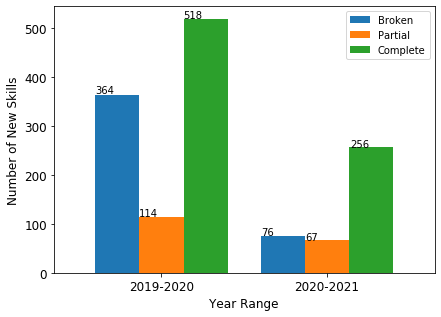

In [25]:
%matplotlib inline

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


plotdata = pd.DataFrame({'Broken':[ATNewSkill2020[0],ATNewSkill2021[0]], 'Partial':[ATNewSkill2020[2],ATNewSkill2021[2]], 
                         'Complete':[ATNewSkill2020[1],ATNewSkill2021[1]]}, index = ['2019-2020','2020-2021'])

ax = plotdata.plot(kind = 'bar',width = 0.8, figsize =(6,5))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()

plt.xlabel('Year Range', fontsize = 12)
plt.ylabel('Number of New Skills', fontsize = 12)
plt.xticks(rotation=0)

plt.savefig('NewSkillsTrace.pdf',bbox_inches='tight')

# **Checking the status of Traceability between years**

In [26]:
def ChangesInTraceability(dfYearNew, dfYearOld):
    
    Broken_Skills = dfYearOld.groupby('traceability')['id_name_dev'].unique()[0]
    print('Total Number of Broken traceability in previous year : {}' .format(len(Broken_Skills)))
    status2020 = dfYearNew[dfYearNew['id_name_dev'].isin(Broken_Skills)].drop_duplicates(subset='id_name_dev')
    print('Total Number of skills that are still in new year : {}' .format(len(status2020)))
    skills_without_perm = len(status2020) - sum(status2020.traceability.value_counts())
    print('New Status below:')
    skills_removed = len(Broken_Skills) - len(status2020)
    print('Skills Removed: {}'.format(skills_removed))
    print('Permissions Removed: {}'.format(skills_without_perm))
    print(status2020.traceability.value_counts())
  

    #Complete Analysis
    Complete_Skills = dfYearOld.groupby('traceability')['id_name_dev'].unique()[1]
    print('\nTotal Number of Complete traceability in previous year : {}' .format(len(Complete_Skills)))
    status2020 = dfYearNew[dfYearNew['id_name_dev'].isin(Complete_Skills)].drop_duplicates(subset='id_name_dev')
    print('Total Number of skills that are still in new year : {}'.format(len(status2020)))
    skills_without_perm = len(status2020) - sum(status2020.traceability.value_counts())
    print('New Status below:')
    skills_removed = len(Complete_Skills) - len(status2020)
    print('Skills Removed: {}'.format(skills_removed))
    print('Permissions Removed: {}'.format(skills_without_perm))
    print(status2020.traceability.value_counts())

    
    #Partial Analysis
    Partial_Skills = dfYearOld.groupby('traceability')['id_name_dev'].unique()[2]
    print('\nTotal Number of Partial traceability in previous year : {}' .format(len(Partial_Skills)))
    status2020 = dfYearNew[dfYearNew['id_name_dev'].isin(Partial_Skills)].drop_duplicates(subset='id_name_dev')
    print('Total Number of skills that are still in new year : {}' .format(len(status2020)))
    skills_without_perm = len(status2020) - sum(status2020.traceability.value_counts())
    print('New Status below:')
    skills_removed = len(Partial_Skills) - len(status2020)
    print('Skills Removed: {}'.format(skills_removed))
    print('Permissions Removed: {}'.format(skills_without_perm))
    print(status2020.traceability.value_counts())
    
    return True
    

# **Checking the status of Traceability Differences between 2019 and 2020**

In [27]:
ChangesInTraceability(df2020, df2019)

Total Number of Broken traceability in previous year : 302
Total Number of skills that are still in new year : 212
New Status below:
Skills Removed: 90
Permissions Removed: 5
B    199
C      6
P      2
Name: traceability, dtype: int64

Total Number of Complete traceability in previous year : 447
Total Number of skills that are still in new year : 360
New Status below:
Skills Removed: 87
Permissions Removed: 3
C    275
B     80
P      2
Name: traceability, dtype: int64

Total Number of Partial traceability in previous year : 89
Total Number of skills that are still in new year : 76
New Status below:
Skills Removed: 13
Permissions Removed: 1
P    58
B    16
C     1
Name: traceability, dtype: int64


True

# **Checking the status of Traceability Differences between 2020 and 2021**

In [28]:
ChangesInTraceability(df2021, df2020)

Total Number of Broken traceability in previous year : 659
Total Number of skills that are still in new year : 572
New Status below:
Skills Removed: 87
Permissions Removed: 57
B    315
C    162
P     38
Name: traceability, dtype: int64

Total Number of Complete traceability in previous year : 800
Total Number of skills that are still in new year : 773
New Status below:
Skills Removed: 27
Permissions Removed: 3
C    763
B      5
P      2
Name: traceability, dtype: int64

Total Number of Partial traceability in previous year : 176
Total Number of skills that are still in new year : 165
New Status below:
Skills Removed: 11
Permissions Removed: 0
P    163
C      2
Name: traceability, dtype: int64


True

# Traceability Type Per Year

In [29]:
print('Tracebility count for 2019\n\n',df2019.groupby('traceability')['id_name_dev'].nunique()) #same as df2019_selected.traceability.value_counts()
print('\nTracebility count for 2020\n',df2020.groupby('traceability')['id_name_dev'].nunique())
print('\nTracebility count for 2021\n',df2021.groupby('traceability')['id_name_dev'].nunique())

Tracebility count for 2019

 traceability
B    302
C    447
P     89
Name: id_name_dev, dtype: int64

Tracebility count for 2020
 traceability
B    659
C    800
P    176
Name: id_name_dev, dtype: int64

Tracebility count for 2021
 traceability
B     396
C    1183
P     270
Name: id_name_dev, dtype: int64


# Reported Skills to Amazon and Developers

In [30]:
dfreportSkill = pd.read_csv('combinereport.csv')
#dfreportSkill = dfreportSkill[dfreportSkill['Contact_info'].str.contains('@', case=False, na=False)]
reported_Skills = dfreportSkill['Skill Name'].unique()
reportedExisting = df2021[df2021.name.isin(reported_Skills)].drop_duplicates(subset=['id_name_dev'], keep='last')
reportedExisting.groupby('traceability')['name'].nunique()

traceability
B    217
C    264
P    123
Name: name, dtype: int64

In [31]:
def ChangesInTraceability_skillname(dfYearNew, dfYearOld):
    
    Broken_Skills = dfYearOld.groupby('traceability')['Skill Name'].unique()[0]
    print('Total Number of Broken traceability in previous year : {}' .format(len(Broken_Skills)))
    status2020 = dfYearNew[dfYearNew['name'].isin(Broken_Skills)].drop_duplicates(subset='name')
    print('Total Number of skills that are still in new year : {}' .format(len(status2020)))
    skills_without_perm = len(status2020) - sum(status2020.traceability.value_counts())
    print('New Status below:')
    skills_removed = len(Broken_Skills) - len(status2020)
    print('Skills Removed: {}'.format(skills_removed))
    print('Permissions Removed: {}'.format(skills_without_perm))
    print(status2020.traceability.value_counts())
  

    #Partial Analysis
    Partial_Skills = dfYearOld.groupby('traceability')['Skill Name'].unique()[1]
    print('\nTotal Number of Partial traceability in previous year : {}' .format(len(Partial_Skills)))
    status2020 = dfYearNew[dfYearNew['name'].isin(Partial_Skills)].drop_duplicates(subset='name')
    print('Total Number of skills that are still in new year : {}' .format(len(status2020)))
    skills_without_perm = len(status2020) - sum(status2020.traceability.value_counts())
    print('New Status below:')
    skills_removed = len(Partial_Skills) - len(status2020)
    print('Skills Removed: {}'.format(skills_removed))
    print('Permissions Removed: {}'.format(skills_without_perm))
    print(status2020.traceability.value_counts())
    
    return True

In [32]:
ChangesInTraceability_skillname(df2021, dfreportSkill )

Total Number of Broken traceability in previous year : 246
Total Number of skills that are still in new year : 201
New Status below:
Skills Removed: 45
Permissions Removed: 24
B    107
C     41
P     29
Name: traceability, dtype: int64

Total Number of Partial traceability in previous year : 429
Total Number of skills that are still in new year : 410
New Status below:
Skills Removed: 19
Permissions Removed: 16
C    211
B     99
P     84
Name: traceability, dtype: int64


True

# Traceability Distribution of Skills with Inskill Purchase and Permissions

In [33]:
dfSkillPurchase2021 = df2021_selected[df2021_selected['in_skill_purchase'].str.contains('Av', case=False, na=False)]
print('The summary of traceability of skills with inskill purchase and permissions in 2021:'\
      , dfSkillPurchase2021.groupby('traceability')['id_name_dev'].nunique())

dfSkillPurchase2020 = df2020_selected[df2020_selected['in_skill_purchase'].str.contains('Av', case=False, na=False)]
print('\n\nThe summary of traceability of skills with inskill purchase and permissions in 2020:'\
      , dfSkillPurchase2020.groupby('traceability')['id_name_dev'].nunique())


The summary of traceability of skills with inskill purchase and permissions in 2021: traceability
B    17
C    29
P    35
Name: id_name_dev, dtype: int64


The summary of traceability of skills with inskill purchase and permissions in 2020: traceability
B    38
C    25
P    23
Name: id_name_dev, dtype: int64


# Categories of Skill with Inskill Purchase with or without Permission

In [34]:
dfSkillPurchase2021all = df2021[df2021['in_skill_purchase'].str.contains('Av', case=False, na=False)]
dfSkillPurchase2021all = dfSkillPurchase2021all.drop_duplicates('id_name_dev')

dfSkillPurchase2020all = df2020[df2020['in_skill_purchase'].str.contains('Av', case=False, na=False)]
dfSkillPurchase2020all = dfSkillPurchase2020all.drop_duplicates('id_name_dev')

print('The category of Skills with In skill Purchase in 2021 :', dfSkillPurchase2021all.groupby('cat')['id_name_dev'].nunique())

print('\n\nThe category of Skills with In skill Purchase in 2020 :', dfSkillPurchase2020all.groupby('cat')['id_name_dev'].nunique())

The category of Skills with In skill Purchase in 2021 : cat
Accessories                             7
Alarms & Clocks                         3
Astrology                               3
Business & Finance                     13
Communication                           2
Cooking & Recipes                       1
Dating                                  1
Device Tracking                         1
Education & Reference                  55
Exercise & Workout                      1
Flight Finders                          1
Food & Drink                            6
Friends & Family                        2
Game Info & Accessories                 2
Games                                 160
Games & Trivia                        285
Health & Fitness                       26
Home Services                           3
Kids                                   40
Knowledge & Trivia                    194
Lifestyle                              46
Local                                   1
Movie Info & Rev

# Adding a Column with the length of normalised permissions requested

In [35]:
def addpermlength(df):
    df['perm_length'] = ''
    for index, row in df.iterrows():
        permissions_requested = row['perm_requested_norm']
        permissions_requested_2 = permissions_requested.replace('[', '').replace(']', '').replace('\'', '').split(',')
        df.loc[index,'perm_length'] = len(permissions_requested_2)

In [36]:
addpermlength(dfSkillPurchase2021)
dfSkillPurchase2021.groupby('perm_length')['traceability'].value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


perm_length  traceability
1            P               30
             C               20
             B               12
2            P                5
             C                4
             B                3
3            C                4
             B                2
4            C                1
Name: traceability, dtype: int64

# Are skills asking for more permisssion more traceable than those with less permission?

# Plotting the result for df2021 traceability by permission Length Hard coded

In [37]:
#2021 skills with permission that require Policy
addpermlength(df2021_selected)
df2021_selected.groupby('perm_length')['traceability'].value_counts()\

perm_length  traceability
1            C               841
             B               261
             P               123
2            C               173
             B                97
             P                89
3            C               105
             P                41
             B                29
4            C                52
             B                 7
             P                 6
5            C                 7
             P                 7
             B                 2
6            C                 5
             P                 3
7            P                 1
Name: traceability, dtype: int64

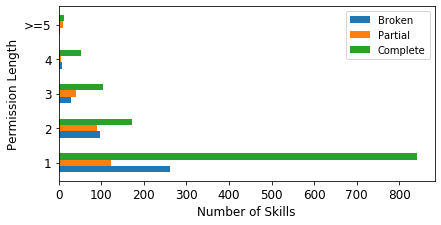

In [38]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

plotdata = pd.DataFrame({'Broken':[261,97,29,7,2], 'Partial':[123,89,41,6,11], 'Complete':[841,173,105,52,12]},
                        index = ['1','2','3','4','>=5'])

plotdata.plot(kind = 'barh',width = 0.55, figsize =(6,3))

plt.tight_layout()

plt.ylabel('Permission Length', fontsize = 12)
plt.xlabel('Number of Skills', fontsize = 12)
plt.savefig('tracebynumofpermission2021.png',bbox_inches='tight')

# Plotting the result for df2020 traceability by permission Length

In [39]:
#2020 skills with permission that require Policy
addpermlength(df2020_selected)
df2020_selected.groupby('perm_length')['traceability'].value_counts()

perm_length  traceability
1            C               590
             B               474
             P                77
2            B               129
             C               103
             P                57
3            C                68
             B                40
             P                33
4            C                35
             B                14
             P                 5
5            C                 3
             B                 2
             P                 2
6            P                 2
             C                 1
Name: traceability, dtype: int64

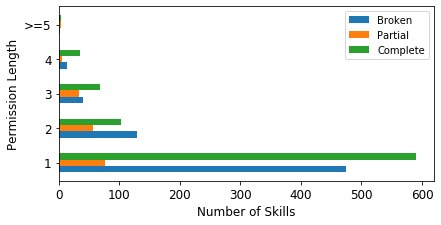

In [40]:
plotdata = pd.DataFrame({'Broken':[474,129,40,14,2], 'Partial':[77,57,33,5,4], 'Complete':[590,103,68,35,4]},
                        index = ['1','2','3','4','>=5'])

plotdata.plot(kind = 'barh',width = 0.55, figsize =(6,3))

plt.tight_layout()

plt.ylabel('Permission Length', fontsize = 12)
plt.xlabel('Number of Skills', fontsize = 12)
plt.savefig('tracebynumofpermission2020.png',bbox_inches='tight')

# Plotting the result for df2019 traceability by permission Length

In [41]:
#2019 skills with permission that require Policy
addpermlength(df2019_selected)
df2019_selected.groupby('perm_length')['traceability'].value_counts()

perm_length  traceability
1            C               346
             B               232
             P                74
2            C                62
             B                53
             P                 8
3            C                35
             B                14
             P                 4
4            C                 3
             B                 2
             P                 1
5            P                 2
             B                 1
6            C                 1
Name: traceability, dtype: int64

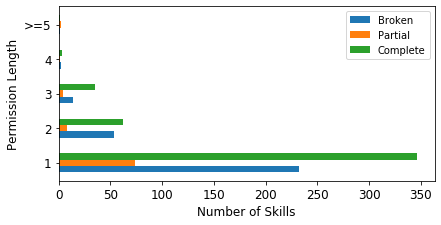

In [42]:
plotdata = pd.DataFrame({'Broken':[232,53,14,2,1], 'Partial':[74,8,4,1,2], 'Complete':[346,62,35,3,1]},
                        index = ['1','2','3','4','>=5'])

plotdata.plot(kind = 'barh',width = 0.55, figsize =(6,3))

plt.tight_layout()

plt.ylabel('Permission Length', fontsize = 12)
plt.xlabel('Number of Skills', fontsize = 12)
plt.savefig('tracebynumofpermission2019.png',bbox_inches='tight')

# Chart for Traceability by Skills. Hard coded

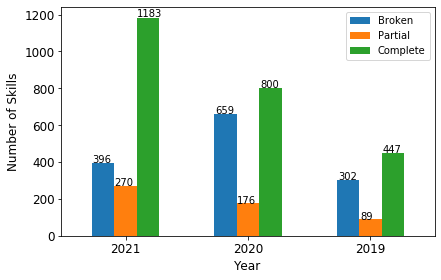

In [43]:
plotdata = pd.DataFrame({'Broken':[396,659,302], 'Partial':[270,176,89], 'Complete':[1183,800,447]},
                        index = ['2021','2020','2019'])

ax = plotdata.plot(kind = 'bar',width = 0.55, figsize =(6,4))

plt.tight_layout()

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Skills', fontsize = 12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.savefig('tracebyyearperskills.png',bbox_inches='tight')

# Traceability by Developers

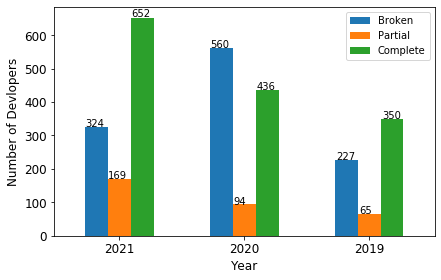

In [44]:
plotdata = pd.DataFrame({'Broken':[324,560,227], 'Partial':[169,94,65], 'Complete':[652,436,350]},
                        index = ['2021','2020','2019'])

ax = plotdata.plot(kind = 'bar',width = 0.55, figsize =(6,4))

plt.tight_layout()

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Devlopers', fontsize = 12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('tracebyyearperdeveloper.png',bbox_inches='tight')

# Chart for Traceability of Skills with In-skill Purchase

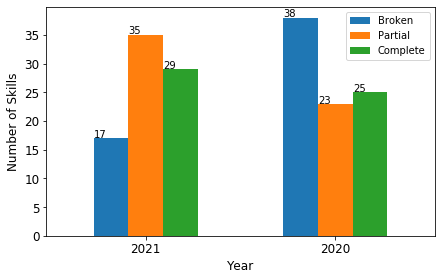

In [45]:
plotdata = pd.DataFrame({'Broken':[17,38], 'Partial':[35,23], 'Complete':[29,25]}, 
                        index = ['2021','2020'])

ax = plotdata.plot(kind = 'bar',width = 0.55, figsize =(6,4))

plt.tight_layout()

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Skills', fontsize = 12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('TracInskillPruchase.png',bbox_inches='tight')

# Chart showing changes in traceabilitybefore and after reporting some of the skills with issues to Amazon

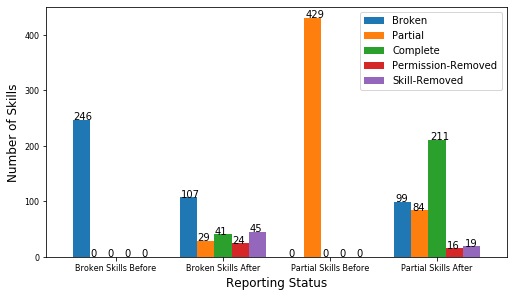

In [46]:
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

plotdata = pd.DataFrame({'Broken':[246,107,0,99], 'Partial':[0,29,429,84], 'Complete':[0,41,0,211], 
                         'Permission-Removed':[0,24,0,16], 'Skill-Removed':[0,45,0,19]}, 
                        index = ['Broken Skills Before','Broken Skills After', 'Partial Skills Before','Partial Skills After'])

ax = plotdata.plot(kind = 'bar',width = 0.8, figsize =(7,5))

plt.tight_layout()

plt.xlabel('Reporting Status', fontsize = 12)
plt.ylabel('Number of Skills', fontsize = 12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('Traceb4andAfterReporting.png',bbox_inches='tight')

# Counting number of skills with permission that warrant privacy policy per category

In [47]:
# Traceability Per number of permission per Categories

def TracByCat(df):
    unique_cat = df['cat'].unique()
    for cat in unique_cat:
        total = []
        for index, row in df.iterrows():
            permissions_requested = str(row['perm_requested_norm'])
            permissions_requested = permissions_requested.replace(']', '').replace('[', '').replace('\'', '')
            permissions_requested = permissions_requested.split(',')
            if len(permissions_requested) > 0 and (row['cat'] == cat):
                total.append(len(permissions_requested))
        a = Counter(total)
#         print(a)
#         print(cat, *a)
        print(cat, '#', a[1],'#', a[2],'#', a[3],'#', a[4],'#', a[5],'#', a[6],'#', a[7],'#', a[8])

df = df2021_selected.drop_duplicates('id_name_dev')
result = TracByCat(df)
# Counter(result)

Travel & Transportation # 39 # 20 # 9 # 2 # 0 # 0 # 0 # 0
Business & Finance # 95 # 31 # 18 # 5 # 2 # 2 # 0 # 0
Education & Reference # 67 # 27 # 7 # 20 # 1 # 0 # 0 # 0
Fitness & Sports # 1 # 0 # 0 # 0 # 0 # 0 # 0 # 0
Health & Fitness # 70 # 16 # 20 # 4 # 0 # 0 # 0 # 0
Food & Drink # 54 # 18 # 6 # 4 # 1 # 5 # 0 # 0
Lifestyle # 100 # 16 # 16 # 7 # 2 # 1 # 0 # 0
News # 27 # 40 # 0 # 0 # 0 # 0 # 0 # 0
Shopping # 30 # 52 # 38 # 7 # 5 # 0 # 1 # 0
Social # 17 # 8 # 4 # 0 # 1 # 0 # 0 # 0
Weather # 58 # 11 # 0 # 0 # 0 # 0 # 0 # 0
nan # 0 # 0 # 0 # 0 # 0 # 0 # 0 # 0
Music & Audio # 292 # 4 # 14 # 1 # 0 # 0 # 0 # 0
Smart Home # 26 # 17 # 6 # 1 # 0 # 0 # 0 # 0
Games & Trivia # 85 # 17 # 11 # 2 # 1 # 0 # 0 # 0
Productivity # 38 # 19 # 3 # 1 # 0 # 0 # 0 # 0
Movies & TV # 5 # 1 # 1 # 0 # 2 # 0 # 0 # 0
Novelty & Humour # 0 # 1 # 0 # 0 # 0 # 0 # 0 # 0
Utilities # 19 # 1 # 2 # 1 # 0 # 0 # 0 # 0
Knowledge & Trivia # 7 # 9 # 0 # 0 # 0 # 0 # 0 # 0
Streaming Services # 3 # 1 # 5 # 0 # 0 # 0 # 0 # 0
Calenda